In [2]:
import numpy as np
from sklearn.cluster import KMeans
import torch
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.manifold import TSNE
import numpy as np
import matplotlib
import japanize_matplotlib
import glob
import sys
sys.path.append("C:/Users/yuuta/Documents/fashion")
from utils.util import open_json
from utils.util import filter_basic_items

In [3]:
N = 400

In [4]:
path = glob.glob(
    "C:/Users/yuuta/Documents/fashion/data/test/**/*.json"
    # "C:/Users/yuuta/Documents/fashion/data/train/**/*.json"
)

In [5]:
id_to_vector = open_json('C:/Users/yuuta/Documents/fashion/experiments/data/id_to_vector_versatility.json')

In [6]:
from utils.util import is_target_category
labels = []
vectors = []
for fp in path:
    json_dict = open_json(fp)
    items = list(filter(is_target_category, json_dict["items"]))
    for item in items:
        # l = item["category x color"].split(" × ")[0]
        l = item["category x color"]
        labels.append(l)
        itemId = str(item['itemId'])
        v = torch.tensor(id_to_vector[itemId])
        vectors.append(v)

In [7]:
labels_list = list(set(labels))
labels = [labels_list.index(l) for l in labels]

In [8]:
print(len(vectors), len(labels), len(labels_list))

142421 142421 227


In [9]:
tensor = torch.stack(vectors).numpy()

In [10]:
p = torch.ones(len(tensor))
index = p.multinomial(num_samples=10000, replacement=False)
sampling_tensor = tensor[index]
sampling_label = np.array(labels)
sampling_label = sampling_label[index]

In [11]:
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000)
X_embedded = tsne.fit_transform(sampling_tensor)
X = pd.DataFrame(X_embedded, columns = ['col1', 'col2'])

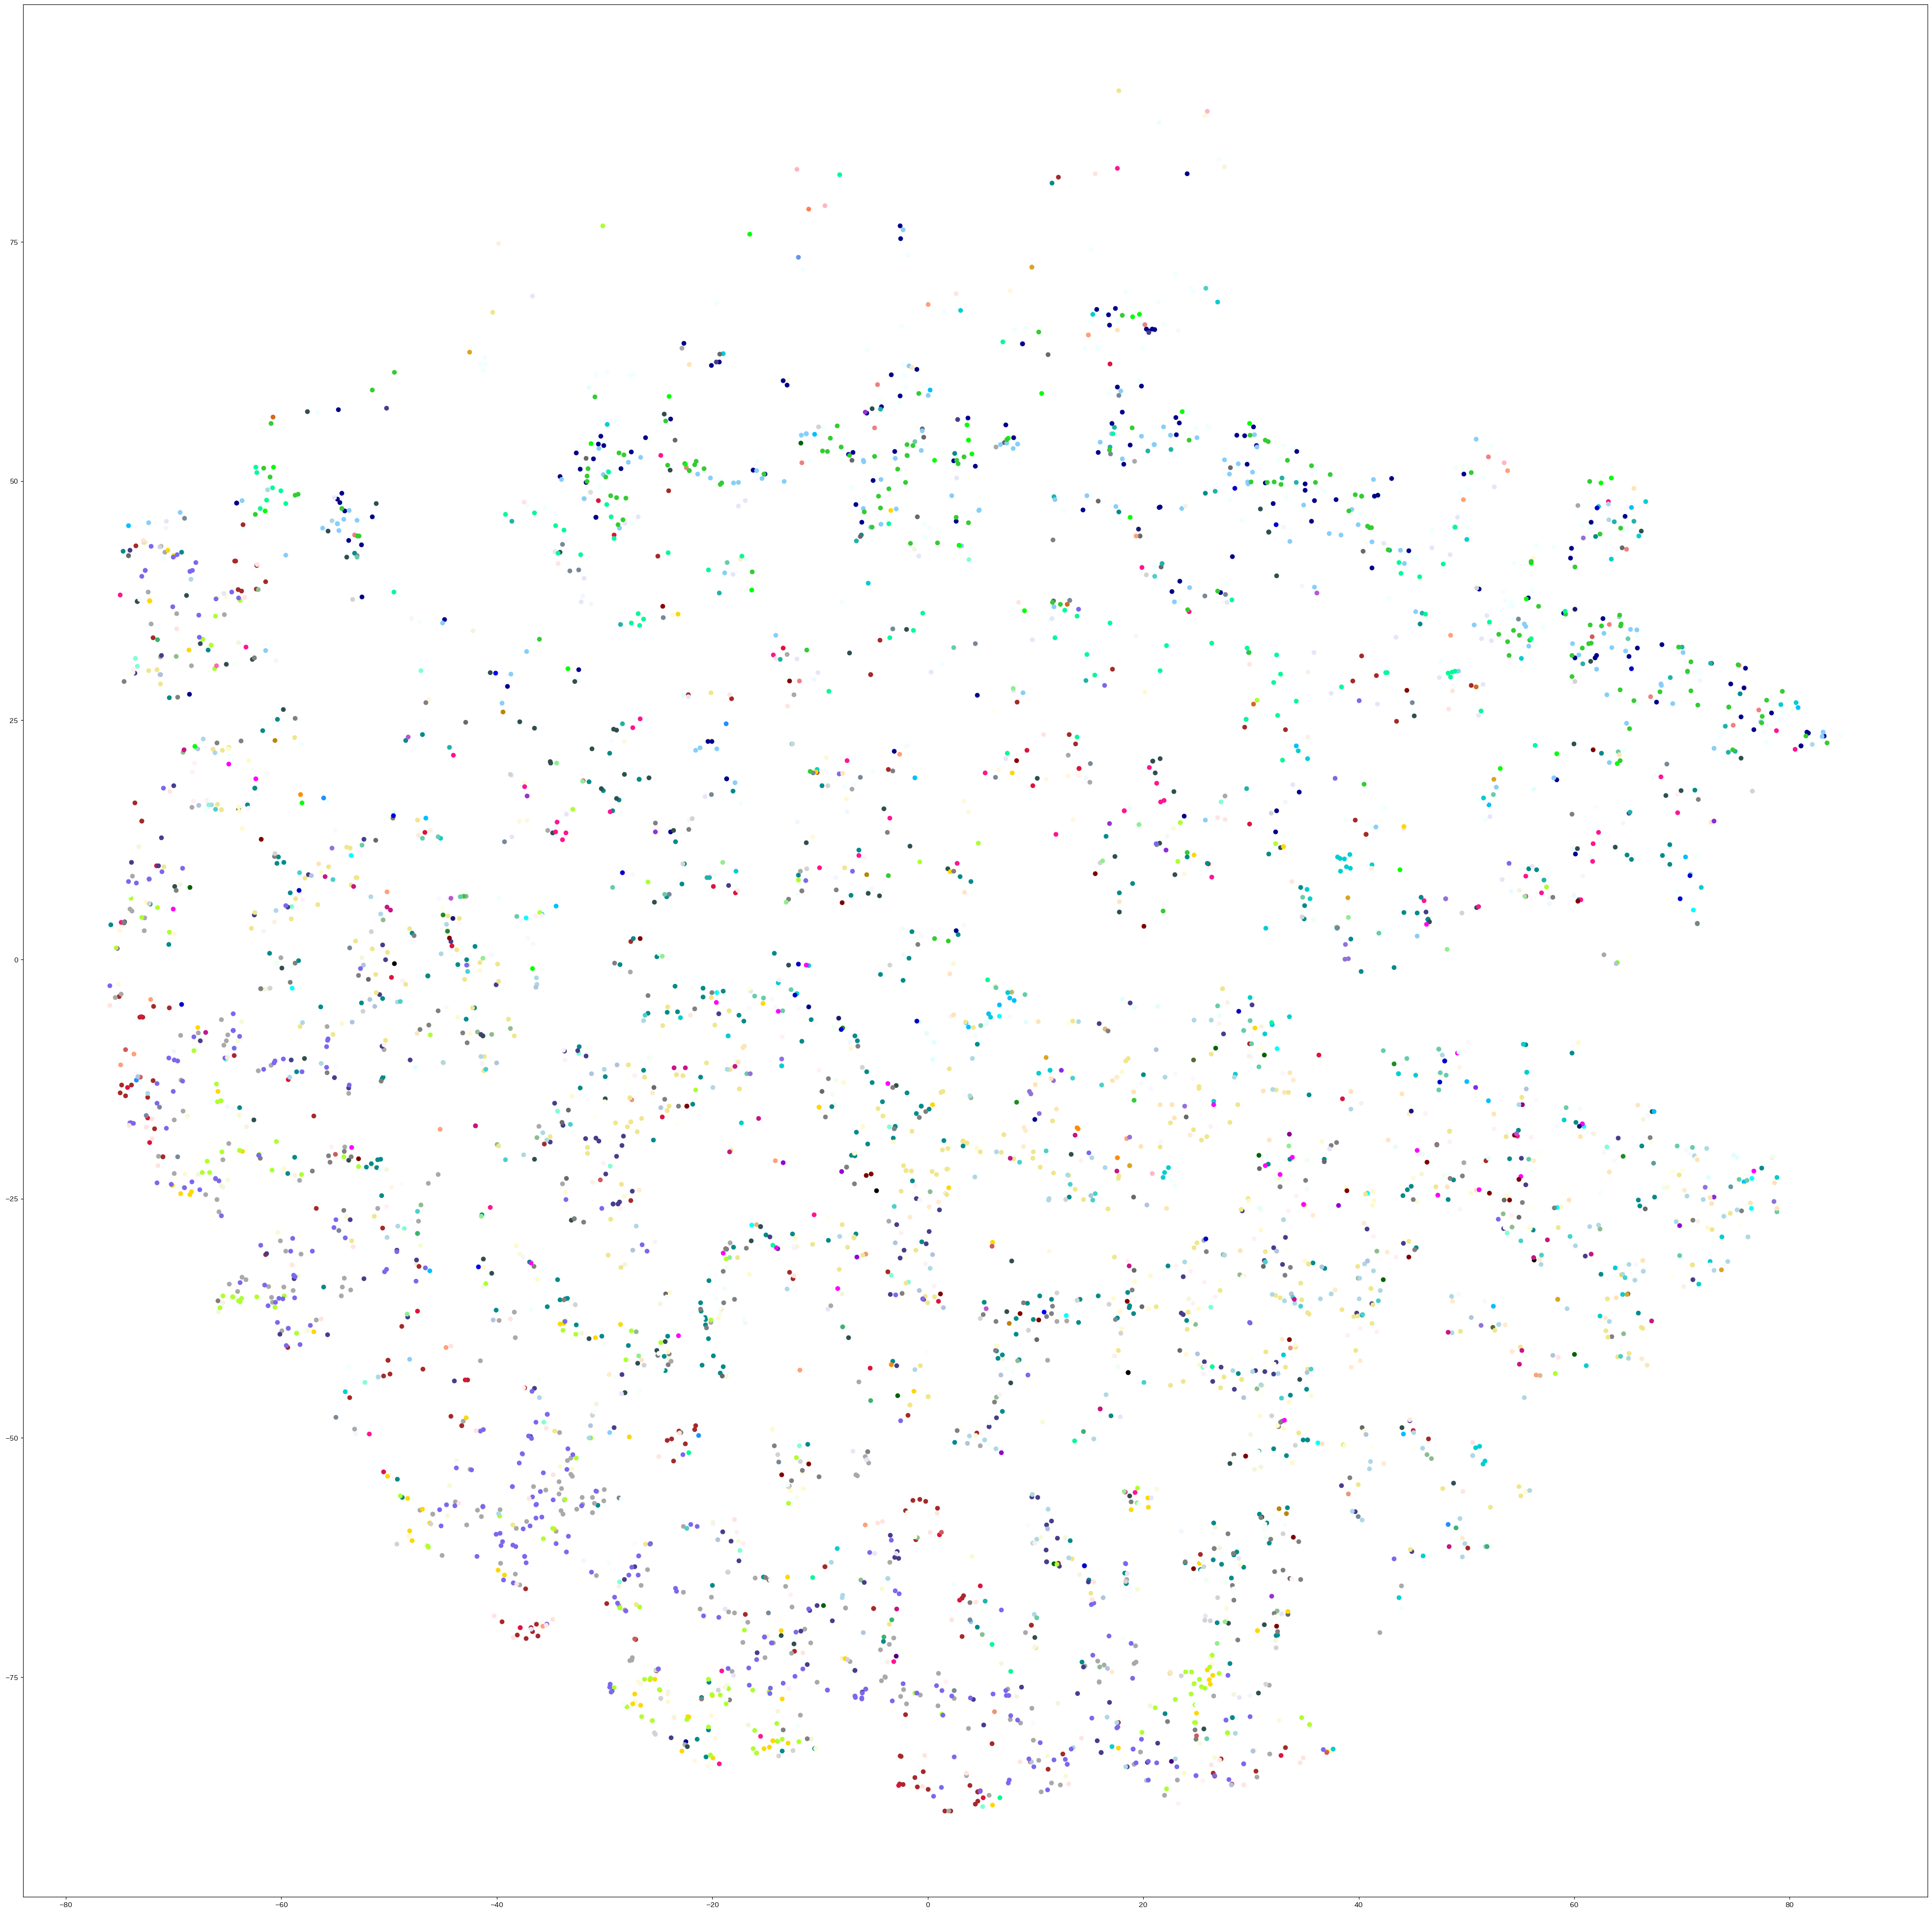

In [16]:
fig = plt.figure(figsize = (50, 50))
colors = list(matplotlib.colors.CSS4_COLORS.values())
for i in range(100):
    category_mask = sampling_label == np.array(i)
    tmp_df = X[category_mask]
    plt.scatter(tmp_df['col1'],
                tmp_df['col2'],
                color = colors[i])

In [13]:
fig.savefig(f'C:/Users/yuuta/Documents/fashion/model_learning/versatility/result/clustering_color.png')